# АНАЛИЗ ГИПОТЕЗ ПО УВЕЛИЧЕНИЮ ВЫРУЧКИ ИНТЕРНЕТ-МАГАЗИНА

# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.   
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

*Часть 1. Приоритизация гипотез.*<br>
**Задача:**<br>
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br>
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br>
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

*Часть 2. Анализ A/B-теста*<br>
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

# Часть 1. Приоритизация гипотез.

In [1]:
# импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузим датасет
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
# получим информацию о содержимом
pd.set_option('max_colwidth', 110)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Видим 9 гипотез с указанными параметрами Reach, Impact, Confidence, Effort - соответствует условиям задания. <br> В данных нет пропусков, нужно только привести названия столбцов к нижнему регистру

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# применим фреймворк ICE для приоретизации гипотез и отсортируем по убыванию приоритета
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


топ-3 наиболее приоритетные гипотезы: <br>
* Запустить акцию, дающую скидку на товар в день рождения(8);
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(0);
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(7).

In [6]:
# применим фреймворк RICE для приоретизации гипотез и отсортируем по убыванию приоритета
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


топ-3 наиболее приоритетные гипотезы: <br>
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(7);
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа(2);
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(0).

***Вывод:*** <br>
1.При применении фреймворка ICE топ-3 наиболее приоритетные гипотезы: <br>
* Запустить акцию, дающую скидку на товар в день рождения(8);
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(0);
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(7).<br>
2.При применении фреймворка ICE топ-3 наиболее приоритетные гипотезы: <br>
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(7);
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа(2);
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(0).<br>
<br>
Топ-3 в зависимости от использованного фреймворка разные, так произошло потому что фреймворк RICE учитывает показатель Reach(охват) - количество пользователей, которых затронут изменения, чем их больше, тем приоритет гипотезы выше. Фреймворк ICE его не учитывает.<br> Гипотезы 7 и 0 попали в топ в обоих случаях.

# Часть 2. Анализ A/B-теста

In [7]:
# загрузим датасеты
orders = pd.read_csv('/datasets/orders.csv', sep=',')

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

Получим общую информацию о датасетах

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.duplicated().sum()

0

В данных нет пропусков и дубликатов, необходимо изменить привести стоблцы с датой к формату datetime

In [14]:
# приводим данные столбцов 'date' к формату datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим все ли корректно 

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
# отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем id пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

58

58 пользователей оказались в обеих группах, их количество невелико, можно оставить их в тесте.

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [40]:
#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))
cumulativeData.info()

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     int64         
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ KB


In [20]:
# проверим корректность созданного датафрейма, сравнив минимальную и максимальную даты
print(orders['date'].agg(['min','max']))
print(cumulativeData['date'].agg(['min','max']))

min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]
min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]


In [39]:
orders['date'][0]

Timestamp('2019-08-15 00:00:00')

Переходим к построению графиков

## Построим график кумулятивной выручки по группам

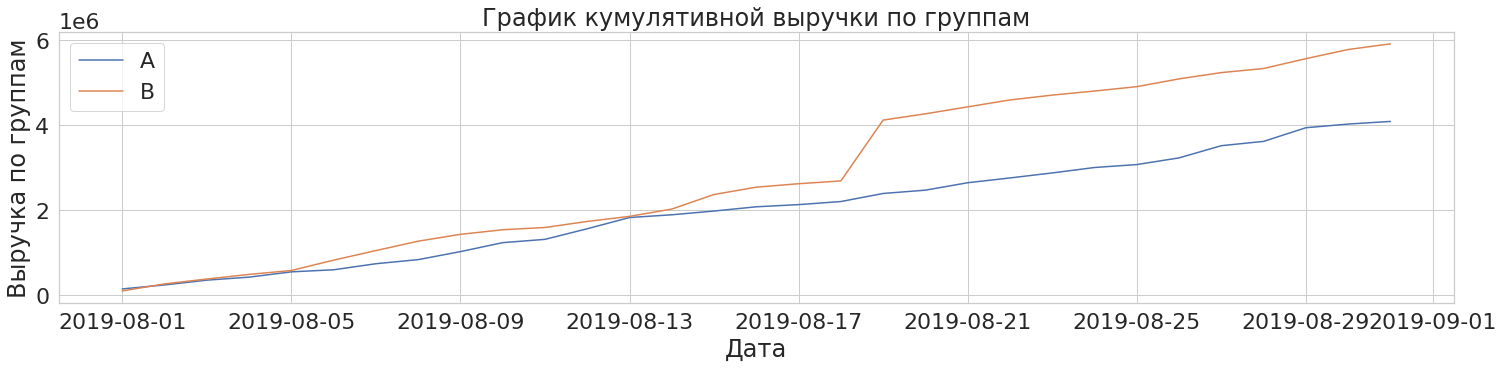

In [21]:
sns.set(font_scale=2, style='whitegrid', rc={'figure.figsize':(25,5)})

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка по группам')
plt.legend();

***Вывод:***<br>
На графике кумулятивной выручки по группам:<br>
1.Выручка растет в обеих группах;<br>
2.Значимых отличий в группах не наблюдается приблизительно до 18.08.2019, далее видим резкий рост в группе В, вызванный увеличением количества или стоимости заказов;<br>
3.Далее резких скачков не замечено.

## Построим график кумулятивного среднего чека по группам

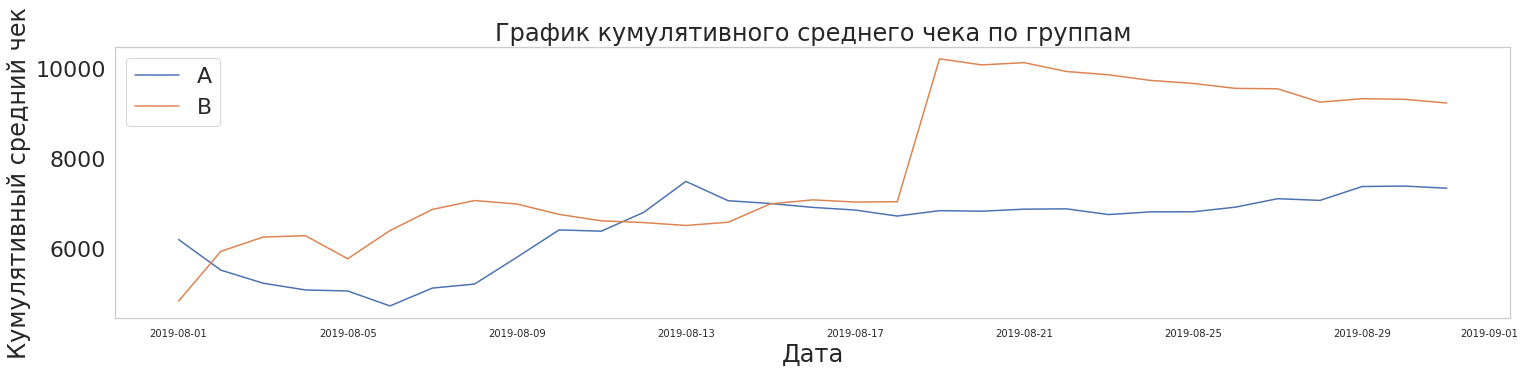

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.grid()
plt.legend()
plt.show()

***Вывод:***<br>
На графике кумулятивного среднего чека по группам:<br>
1.Графики колеблются приблизительно до 18.08.2019, далее у группы В резкий рост среднего чека, видимо были сделаны дорогие заказы, после резкого скачка приблизительно 19.08.2019 в группе В начинается плавное снижение значения кумулятивного среднего чека;<br>
2.Для обеих групп кумулятивное значение среднего чека становится более стабильным к концу теста.

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A

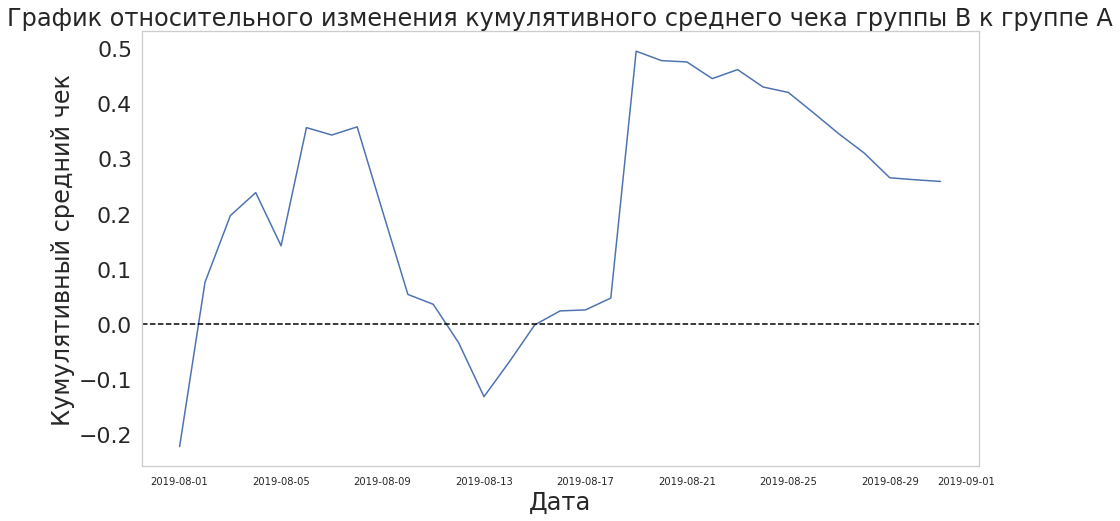

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# строим графики
plt.tick_params(axis='x', which='major', labelsize=10)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.grid()
plt.show()

***Вывод:***<br>
Графике относительного изменения кумулятивного среднего чека группы B к группе A нестабильный, значительные резкие скачки, например 05.08 или 08.08, 18.08. Очевидно есть выбросы.

## Постройте график кумулятивного среднего количества заказов на посетителя по группам

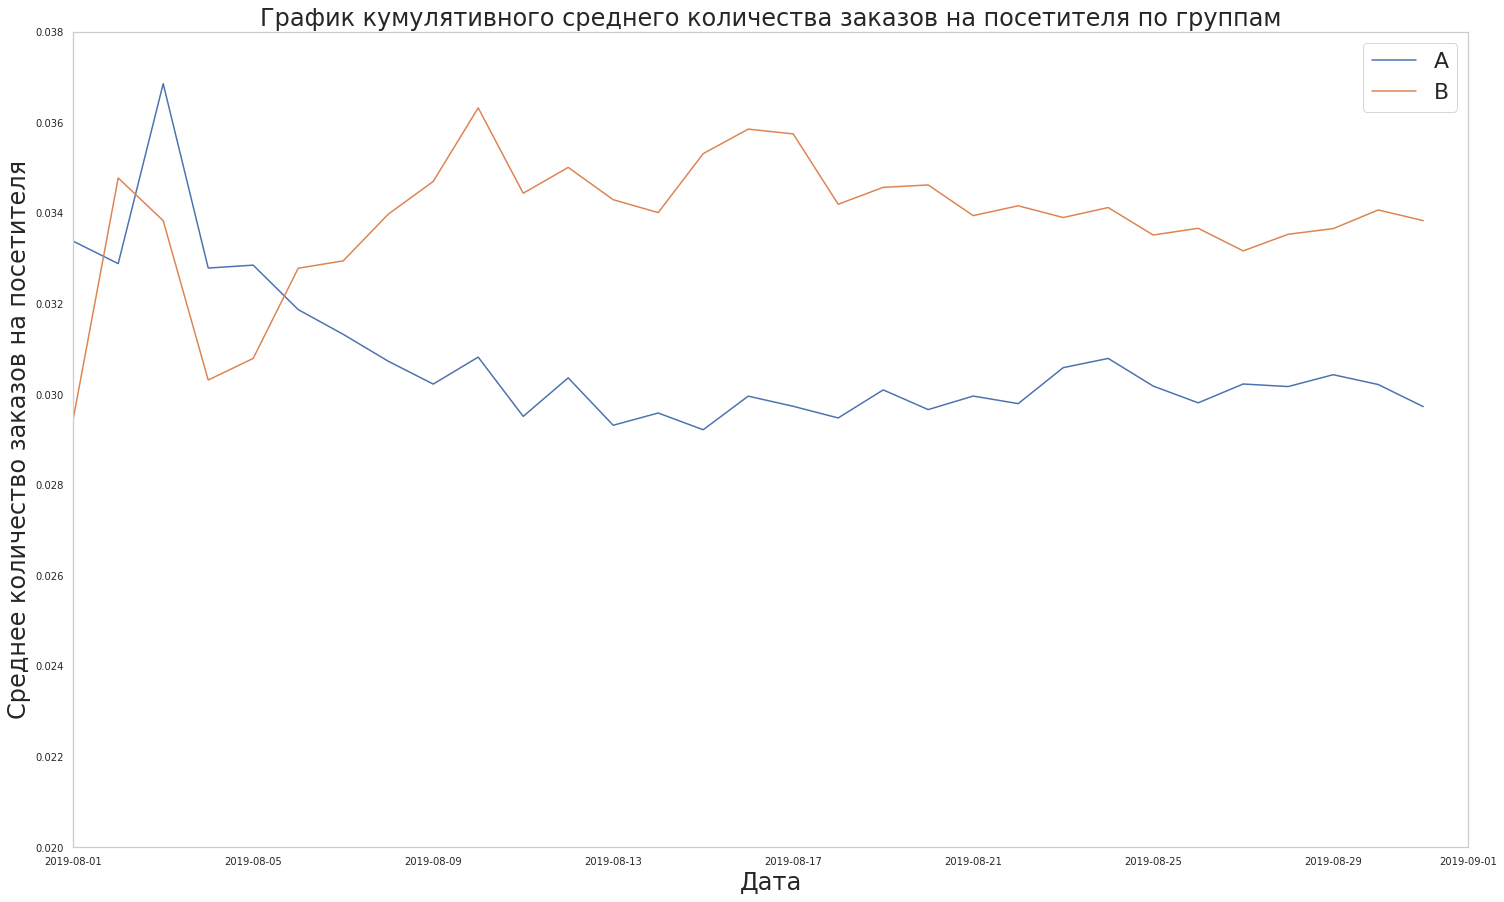

In [24]:
# считаем кумулятивную среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(25, 15))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.020, 0.038])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cumulativeDataA

***Вывод:***<br>
1.В самом начале теста графики колеблются, к концу 1-й недели кумулятивное среднее количество заказов на посетителя в группе В выросло, а в группе А снизилось,  к 10.08 различие очевидно, график стремится стабилизироваться;<br>
2.умулятивное среднее количество заказов на посетителя в группе В стабильно лучше, чем в группе А.

## Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

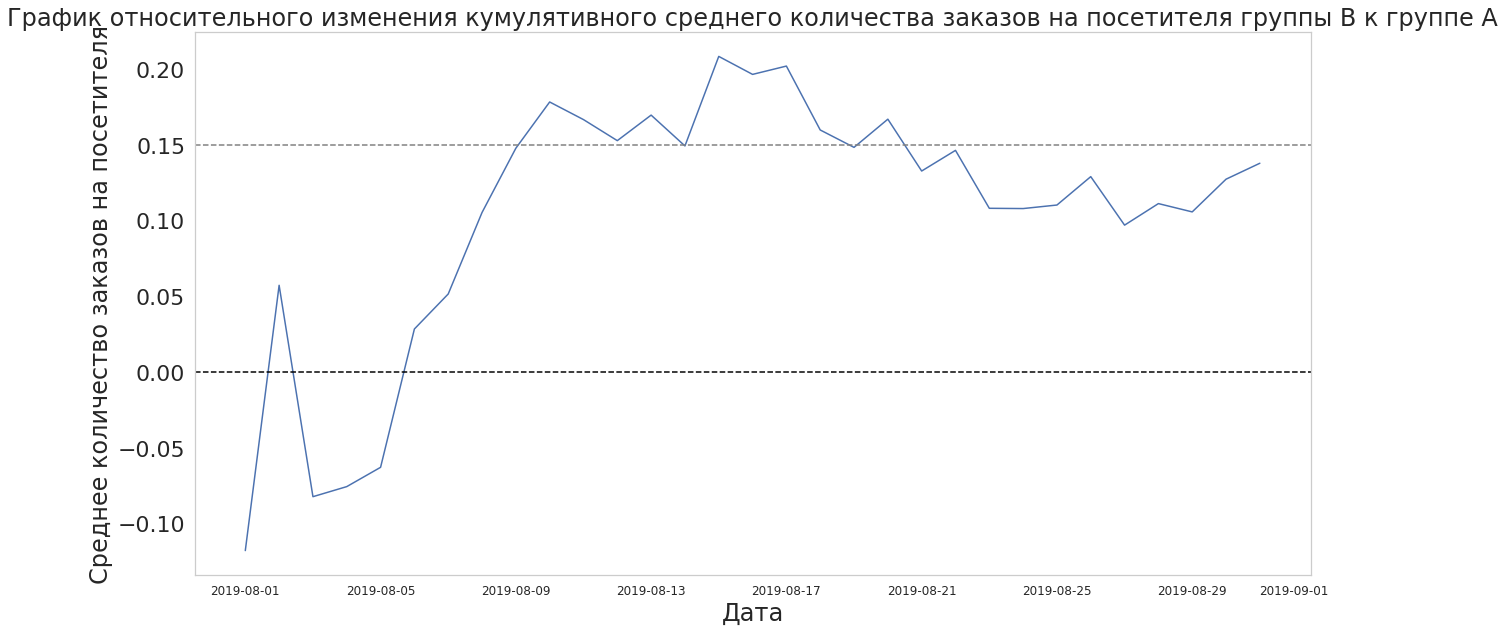

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график
plt.figure(figsize=(20, 10))
plt.tick_params(axis='x', which='major', labelsize=12)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.grid()
plt.show()

***Вывод:***<br>Результаты группы В значительно лучше, чем у группы А, начиная приблизительно с 05.08.

## Постройте точечный график количества заказов по пользователям

In [26]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


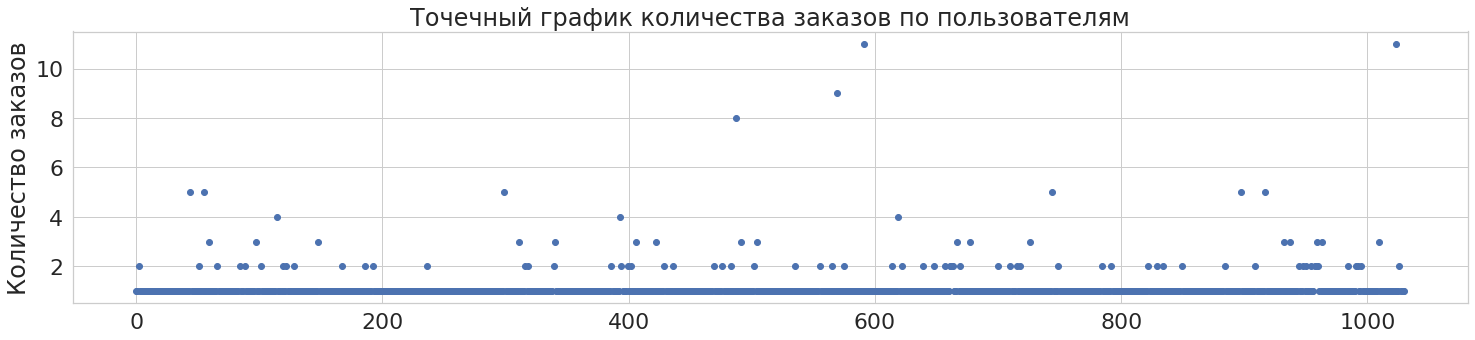

In [27]:
#Строим график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов');

***Вывод:***<br>
Большинство пользователей совершало по 1 заказу, значительно меньше - 2 заказа, 3 заказа исключительная редкость, возможно это выбросы. Необходимо посчитать 95 и 99 процентили

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [28]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


***Вывод:***<br>Не более 5% пользователей делали более 1 заказа, более 2х заказов делали не более 1% пользователей, значения больше 1 заказа на 1 пользователя будем считать аномальными

## Построим точечный график стоимостей заказов

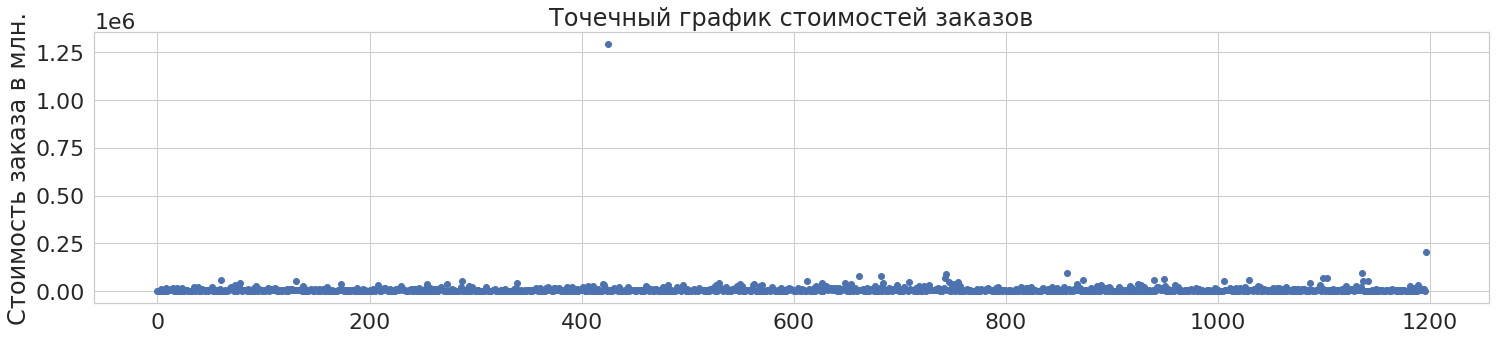

In [29]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.');

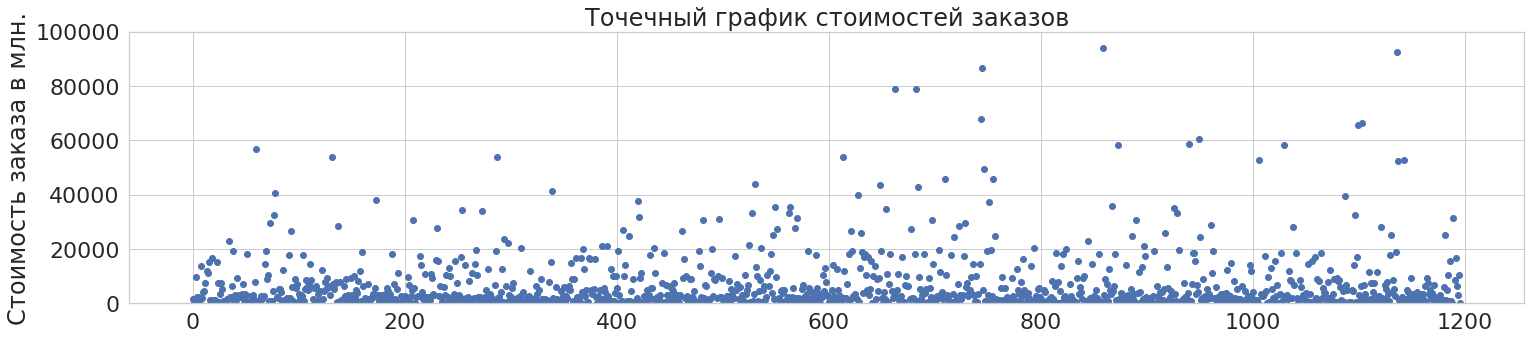

In [30]:
y_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(y_values, orders['revenue']);
plt.ylim(0, 100000)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.');

***Вывод:***<br>На графике 1 заказ на сумму около 1.3 млн. и 1 заказ на сумму около 250 тыс., чтобы определить считать ли их аномалиями, построим 95 и 99 процентили. Наибольшее количество заказов на сумму приблизительно до 30 000.

## Посчитаем 95-й и 99-й перцентили стоимости заказов

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


***Вывод:***<br>Не более 5% пользователей делали заказы на сумму более 28 000, не более 1% пользователей делали заказы на сумму более 58 233. Заказы на сумму более 28 000 следует считать аномальными

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.<br> Ключевая идея — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки. <br>Разница между рангами одних и тех же значений может быть одинакова, и такой сдвиг называют типичным. <br> А нетипичные сдвиги по рангу рассматриваются как изменения. Сумма рангов таких сдвигов и выступает значением критерия. Чем он выше — тем больше вероятность, что для этих выборок интересующая нас величина различается.<br>Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.<br> Статистически значимой разницей между выборками (p-value) будет считается разница от 5% (т.е. alpha = 0.05).

Сформулируем гипотезы:<br>
<br>
H0:Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет;<br>
<br>
H1:Среднее количество заказов на посетителя групп A и B различны, статистически значимые отличия есть. <br>
<br>
alpha = 0.05

In [32]:
# Количество заказов в группе A по дате
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Количество пользователей в группе B по дате
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Количество пользователей в группе A по дате
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Количество пользователей в группе B по дате
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Cуммарное число пользователей до выбранной даты включительно в группе A
visitorsCummulativeA = cumulativeData[cumulativeData['group']=='A'][['date','visitors']]
visitorsCummulativeA.columns = ['date', 'visitorsCummulativeA']

# Cуммарное число пользователей до выбранной даты включительно в группе B
visitorsCummulativeB = cumulativeData[cumulativeData['group']=='B'][['date','visitors']]
visitorsCummulativeB.columns = ['date', 'visitorsCummulativeB']

# Cуммарное число заказов до выбранной даты включительно в группе A
ordersCummulativeA = cumulativeData[cumulativeData['group']=='A'][['date','orders', 'revenue']]
ordersCummulativeA.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# Cуммарное число заказов до выбранной даты включительно в группе B
ordersCummulativeB = cumulativeData[cumulativeData['group']=='B'][['date','orders', 'revenue']]
ordersCummulativeB.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersCummulativeA, left_on='date', right_on='date', how='left')
    .merge(ordersCummulativeB, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsCummulativeA, left_on='date', right_on='date', how='left')
    .merge(visitorsCummulativeB, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительные различия:',"{0:.2f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительные различия: 0.14


***Вывод:***<br>P-value = 0.017 меньше 0.05, значит стоит отвергнуть нулевую гипотезу. "Сырые данные" говорят о том, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к  группе А равен 14%

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Гипотезы:<br>
<br>
H0:Средние чеки групп A и B равны, статистически значимых отличий нет;<br>
<br>
H1:Средние чеки групп A и B различны, статистически значимые отличия есть.

In [33]:
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:',"{0:.2f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительные различия: 0.26


***Вывод:***<br>
P-value = 0.729 значительно больше 0.05. Значит, нулевую гипотезу принимаем.
При этом средний чек группы B значительно выше чем у А, почти на 26%, но тут свою роль могли сыграть выбросы, проверим это далее на очищенных данных.

## Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данными

За аномальных пользователей примем тех, кто совершил более 1 заказа или совершил заказ дороже 28 000 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

Гипотезы:<br>
<br>
H0:Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет;<br>
<br>
H1:Среднее количество заказов на посетителя групп A и B различны, статистически значимые отличия есть. <br>
<br>
alpha = 0.05

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['orders'], [95])[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersB['orders'], [95])[0]]['visitorId'],
    ],
    axis=0,
)

# Вычисляем границы аномальной выручки в заказе
percentileRevenue = np.percentile(orders['revenue'], [95])[0]

usersWithExpensiveOrders = orders[orders['revenue'] > percentileRevenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


Получили 74 аномальных пользователя, проверим как они повлияли на результат теста.

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.2f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.013
Относительные различия: 0.17


***Вывод:***<br>
P-value = 0.013 меньше 0.05, значит стоит отвергнуть нулевую гипотезу.

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Гипотезы:<br>
<br>
H0:Средние чеки групп A и B равны, статистически значимых отличий нет;<br>
<br>
H1:Средние чеки групп A и B различны, статистически значимые отличия есть.
<br>

alpha = 0.05

In [36]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.738
Относительные различия: -0.020


***Вывод:***<br>
1.Значение p-value стало уменьшилось с 0.729 до 0.738, по-прежнему больше 0.05, стоит принять нулевую гипотезу;<br>
2.Разница между средним чеком уменьшилась с 26% в пользу B до 2% в пользу A, это говорит о том, что разница была связана с выбросами.

# Вывод

1.По кумулятивной выручке по группам значимых отличий не наблюдается, кроме скачка 18.08., после которого снова ровные графики;<br>
2.Для обеих групп кумулятивное значение среднего чека становится более стабильным к концу теста;<br>
3."Сырые данные" говорят о том, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к  группе А равен 14%;<br>
4.Лидером по среднему количеству заказов на посетителя между группами является группа В;<br>
5.Разница по среднему чеку заказа между группами была вызвана выбросами;<br>
6.Исходя из обнаруженных фактов тест следует остановить и признать его успешным для группы B по среднему количеству заказов на посетителя, по среднему чеку нельзя утверждать, что какая - либо из групп имеет преимущество над другой. Оснований полагать, что при продолжении теста разница между группами в среднем чеке значимо изменится нет, т.к. колебания в графиках носят затухающий характер.